In [27]:
import pandas as pd
from bson.json_util import dumps
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('./datasets/Solargis_min15_Almeria_Spain.csv')

In [9]:

df10 = pd.read_csv('./datasets/Solargis_min15_Almeria_Spain.csv', chunksize=5)
for chunk in df10:
    print(chunk)

         Date   Time  GHI  DIF  GTI  flagR     SE      SA  Temperature   WS  \
0  01.12.2018  00:10    0    0    0      0 -74.58 -170.32          8.7  2.0   
1  01.12.2018  00:25    0    0    0      0 -73.76 -157.90          8.6  1.9   
2  01.12.2018  00:40    0    0    0      0 -72.37 -146.93          8.4  1.9   
3  01.12.2018  00:55    0    0    0      0 -70.53 -137.62          8.3  1.9   
4  01.12.2018  01:10    0    0    0      0 -68.37 -129.84          8.2  1.9   

    WD  
0  285  
1  281  
2  279  
3  276  
4  274  
         Date   Time  GHI  DIF  GTI  flagR     SE      SA  Temperature   WS  \
5  01.12.2018  01:25    0    0    0      0 -65.97 -123.34          8.1  2.0   
6  01.12.2018  01:40    0    0    0      0 -63.39 -117.86          8.1  2.1   
7  01.12.2018  01:55    0    0    0      0 -60.69 -113.17          8.0  2.2   
8  01.12.2018  02:10    0    0    0      0 -57.90 -109.09          7.9  2.4   
9  01.12.2018  02:25    0    0    0      0 -55.05 -105.49          7.9  2.4 

In [10]:
df.describe()

GHI          DIF          GTI        flagR           SE  \
count  2976.000000  2976.000000  2976.000000  2976.000000  2976.000000   
mean    116.986895    28.167339   214.984207     0.539651   -17.132950   
std     179.097356    42.664589   320.607784     0.813194    35.141727   
min       0.000000     0.000000     0.000000     0.000000   -76.350000   
25%       0.000000     0.000000     0.000000     0.000000   -49.210000   
50%       0.000000     0.000000     0.000000     0.000000   -13.835000   
75%     227.000000    57.000000   450.250000     1.000000    16.340000   
max     550.000000   243.000000   935.000000     3.000000    31.080000   

                SA  Temperature           WS           WD  
count  2976.000000  2976.000000  2976.000000  2976.000000  
mean     -0.125517    11.287903     2.136761   223.197917  
std      82.966676     4.214412     1.240043   114.856026  
min    -179.990000     3.800000     0.000000     0.000000  
25%     -71.012500     8.200000     1.200000   113.750000  
50%      -0.060000    10.700000     1.900000   282.000000  
75%      71.135000    14.000000     2.900000   312.000000  
max     179.560000    23.700000     9.200000   360.000000

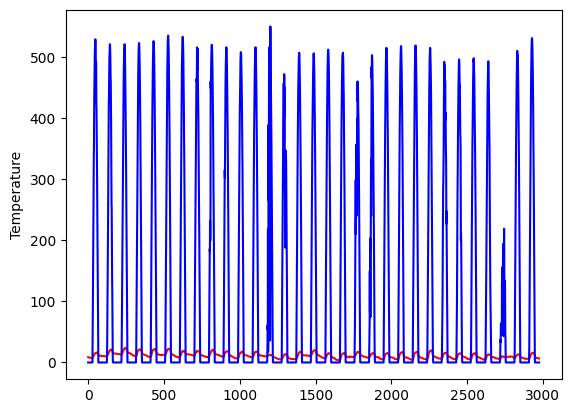

In [5]:


#import matplotlib.pyplot as plt

# plt.figure(title = "data")
plt.plot(df["Temperature"].to_list(), color='red')
plt.plot(df["GHI"].to_list(), color='blue')
plt.ylabel('Temperature')
plt.show()


In [31]:
import redis
import json

redisClient = redis.StrictRedis(host='0.0.0.0', port=6379, db=0)

In [45]:
redisClient.xadd('test', {'Temperature': 1, 'GHI': 2})
redisClient.xadd('test', {'Temperature': 5, 'GHI': 2})

b'1668640474095-1'

In [44]:
ste = redisClient.xrange('test',min='1668636475947-0', max='+')
for i in ste:
    print(i[1].get(b'Temperature'))

In [46]:
redisClient.xinfo_stream('test')

{'length': 2,
 'radix-tree-keys': 1,
 'radix-tree-nodes': 2,
 'last-generated-id': b'1668640474095-1',
 'max-deleted-entry-id': b'0-0',
 'entries-added': 2,
 'recorded-first-entry-id': b'1668640474095-0',
 'groups': 0,
 'first-entry': (b'1668640474095-0', {b'Temperature': b'1', b'GHI': b'2'}),
 'last-entry': (b'1668640474095-1', {b'Temperature': b'5', b'GHI': b'2'})}

In [48]:
import matplotlib.pyplot as plt
plt.close("all")

/tmp/ipykernel_65353/910126251.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/tmp/ipykernel_65353/910126251.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./datasets/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


[266.  145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
 194.3 149.5 210.1 273.3 191.4 287.  226.  303.6 289.9 421.6 264.5 342.3
 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3 646.9]
predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


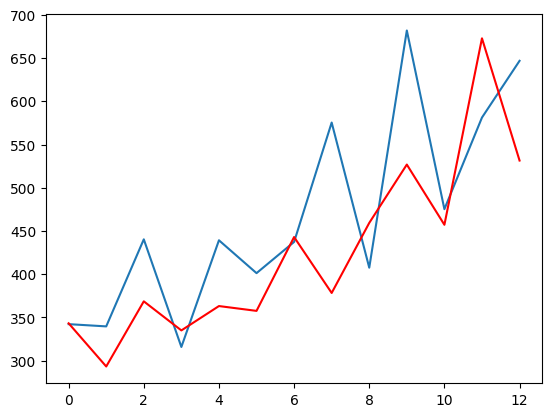

In [4]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('./datasets/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
print(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [23]:
#print(df["Temperature"].to_list())

tempertures = df["Temperature"].to_list()
size = int(len(tempertures) * 0.66)
# train, test = X[0:size], X[size:len(X)]
model = ARIMA(tempertures, order=(5, 1, 0))  
fitted = model.fit()  
#print(fitted.summary())

# Forecast
data= fitted.forecast(5, alpha=0.05)  # 95% conf
print(data)

# Make as pandas series
# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# # Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
# plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()


[6.66659734 6.74167265 6.81306721 6.87078809 6.92388962]


In [69]:
x   = [1,2,3,4,5]
y = [6.66659734,6.74167265,6.81306721,6.87078809,6.92388962]

In [70]:
# plt.plot(x, color='red')
plt.figure(figsize=(12,5), dpi=100)
x = pd.Series(x)
print(x)
y = pd.Series(y, index=x.index+len(x))
print(y)
# plt.plot(x,label='x')
# plt.plot(y,label='y')
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
plt.show()

0    1
1    2
2    3
3    4
4    5
dtype: int64
4    6.666597
5    6.741673
6    6.813067
7    6.870788
8    6.923890
dtype: float64


<Figure size 1200x500 with 0 Axes>